# Проект по SQL

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.
Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Ваша первая задача как аналитика — проанализировать базу данных. В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

### Описание данных

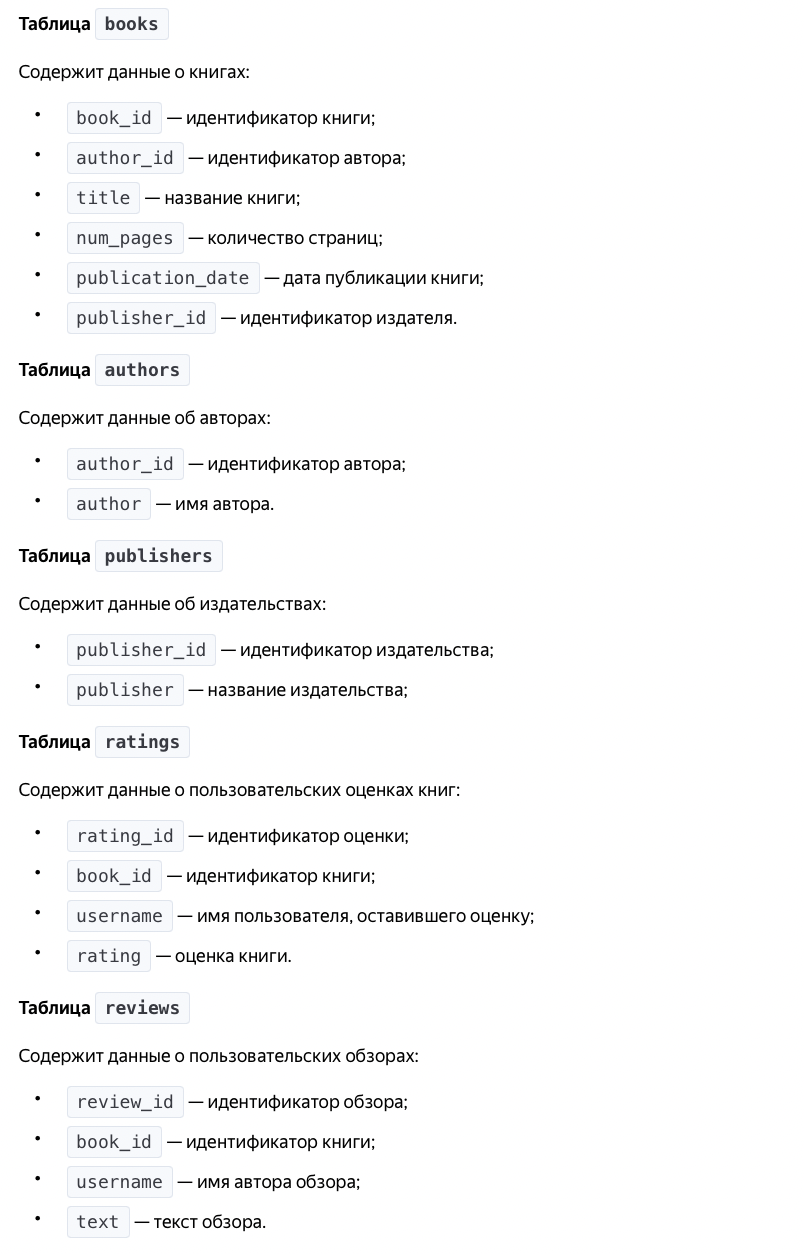

### Схема данных

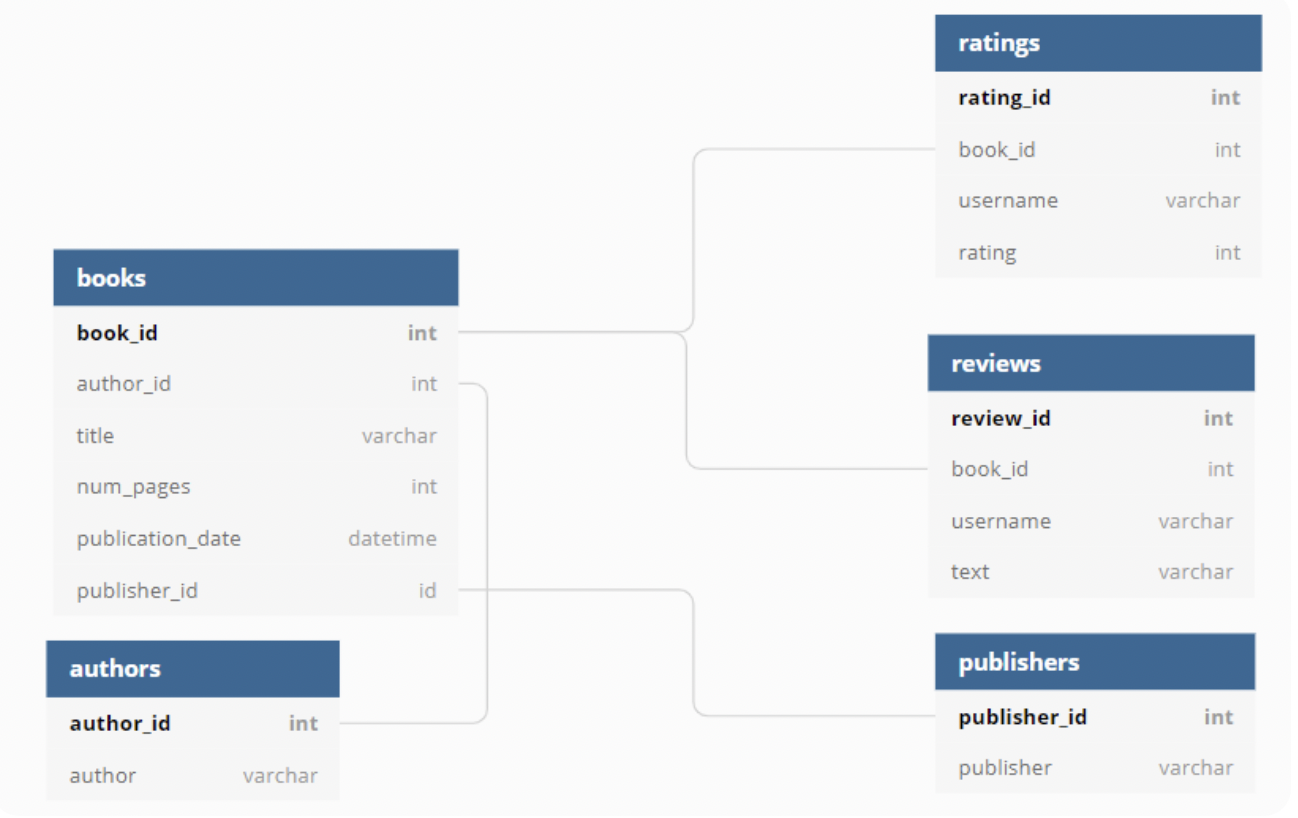

### Задания

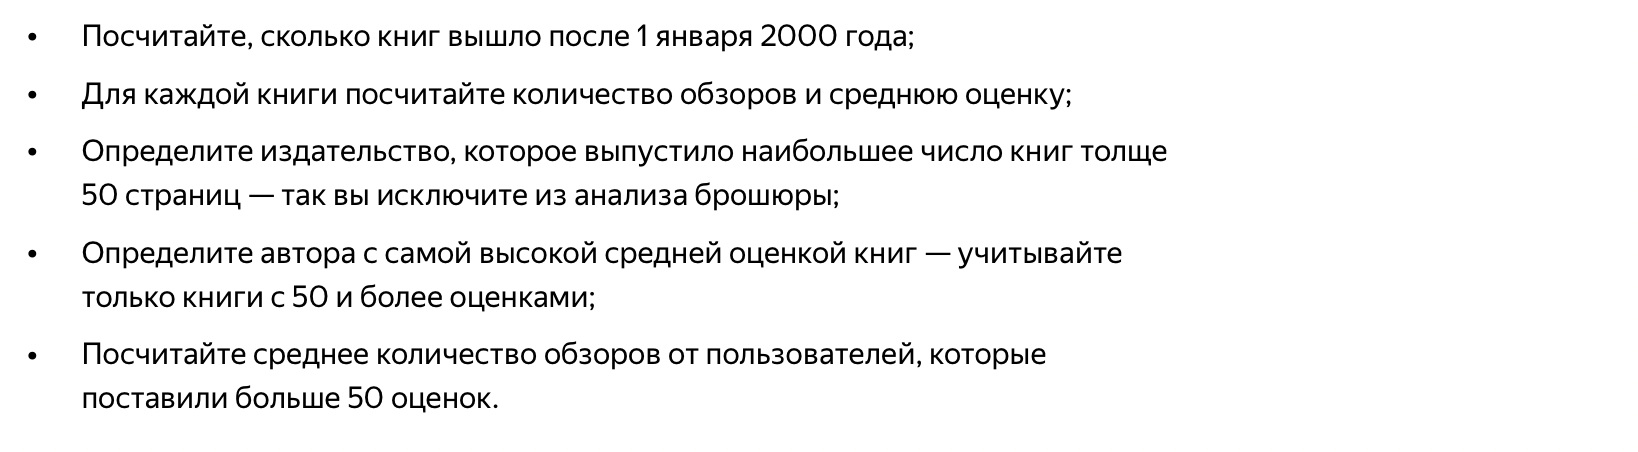

# Предобработка данных:

In [ ]:
# импортируем библиотеки
import pandas as pd

from sqlalchemy import create_engine

pd.options.display.float_format = '{:,.2f}'.format

In [1]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'], db_config['pwd'], db_config['host'], db_config['port'],
db_config['db']) 

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [2]:
query_books = ''' select *
from books'''
books = pd.io.sql.read_sql(query_books, con=engine)
books.head()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [3]:
books.shape

(1000, 6)

In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [5]:
books.duplicated().sum()

0

In [6]:
books.isnull().sum()

book_id             0
author_id           0
title               0
num_pages           0
publication_date    0
publisher_id        0
dtype: int64

В данной таблице указаны id книги, id автора, название произведения, количество страниц, дата публикации, а также id издателя

In [7]:
query_authors = ''' select *
from authors'''
authors = pd.io.sql.read_sql(query_authors, con=engine)
authors.head()

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [8]:
authors.shape

(636, 2)

In [9]:
authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


In [10]:
authors.duplicated().sum()

0

In [11]:
authors.isnull().sum()

author_id    0
author       0
dtype: int64

В данной таблице указаны id автора, а также полное имя автора, либо авторского коллектива

In [12]:
query_ratings = ''' select *
from ratings'''
ratings = pd.io.sql.read_sql(query_ratings, con=engine)
ratings.head()

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [13]:
ratings.shape

(6456, 4)

In [14]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


In [15]:
ratings.duplicated().sum()

0

In [16]:
ratings.isnull().sum()

rating_id    0
book_id      0
username     0
rating       0
dtype: int64

В данной таблице указаны id оценки, id книги, имя пользователя, оставившего оценку, присвоенная оценка 

In [17]:
query_reviews = ''' select *
from reviews'''
reviews = pd.io.sql.read_sql(query_reviews, con=engine)
reviews.head()

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [18]:
reviews.shape

(2793, 4)

In [19]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


In [20]:
reviews.duplicated().sum()

0

In [21]:
reviews.isnull().sum()

review_id    0
book_id      0
username     0
text         0
dtype: int64

В данной таблице указаны id обзора, id книги, имя пользователя, написавшего обзор, текст обзора

In [22]:
query_publishers = ''' select *
from publishers'''
publishers = pd.io.sql.read_sql(query_publishers, con=engine)
publishers.head()

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [23]:
publishers.shape

(340, 2)

In [24]:
publishers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


In [25]:
publishers.duplicated().sum()

0

In [26]:
publishers.isnull().sum()

publisher_id    0
publisher       0
dtype: int64

В данной таблице указаны id издателя, наименование издателя

### Промежуточные выводы:

Во время преобработки данных мы импортировали необходимые библиотеки, после чего ознакомились с 5 таблицами. В этих таблицах не было обнаружено пропусков и дубликатов. Данные были подготовлены для решения поставленных задач. 

# Решение задач:

### - Посчитайте, сколько книг вышло после 1 января 2000 года;

In [27]:
books_after_january_1st = """
select count(book_id) as num_of_books
from books
where publication_date > '2000-01-01'
"""

In [28]:
pd.read_sql(books_after_january_1st,con = engine, index_col='num_of_books')

""
num_of_books
819


### - Для каждой книги посчитайте количество обзоров и среднюю оценку;

In [29]:
reviews_and_rating = """
select books.book_id,
    books.title,
    avg(ratings.rating) as rating_mean,
    count(distinct reviews.text) as reviews_num
from books
left join ratings on ratings.book_id=books.book_id
left join reviews on reviews.book_id=books.book_id
group by
books.title,
books.book_id
    order by
rating_mean desc
"""

In [30]:
pd.read_sql(reviews_and_rating,con = engine, index_col='book_id')

,title,rating_mean,reviews_num
book_id,,,
86,Arrows of the Queen (Heralds of Valdemar #1),5.00,2
901,The Walking Dead Book One (The Walking Dead #...,5.00,2
390,Light in August,5.00,2
972,Wherever You Go There You Are: Mindfulness Me...,5.00,2
136,Captivating: Unveiling the Mystery of a Woman'...,5.00,2
...,...,...,...
915,The World Is Flat: A Brief History of the Twen...,2.25,3
316,His Excellency: George Washington,2.00,2
202,Drowning Ruth,2.00,3


### - Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;

In [31]:
successful_publisher = """
select publisher,
count(book_id) as books_published
from books
left join publishers on publishers.publisher_id=books.publisher_id
where num_pages>50
group by
publisher
order by
books_published desc
"""

In [32]:
pd.read_sql(successful_publisher,con = engine, index_col='publisher').head(1)

,books_published
publisher,
Penguin Books,42


### - Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;

In [37]:
best_selling_author = '''
select author,
avg(step.avg_rating) as rating_mean
from (select author,
books.book_id,
avg(rating) as avg_rating
from authors
left join books on books.author_id=authors.author_id
left join ratings on ratings.book_id=books.book_id
group by
author,
books.book_id
having
count(rating)>50) as step
group by 
author
order by
rating_mean desc
'''

In [38]:
pd.read_sql(best_selling_author,con = engine, index_col='author')

,rating_mean
author,
J.K. Rowling/Mary GrandPré,4.28
Markus Zusak/Cao Xuân Việt Khương,4.26
J.R.R. Tolkien,4.26
Louisa May Alcott,4.19
Rick Riordan,4.08
William Golding,3.90
J.D. Salinger,3.83
Paulo Coelho/Alan R. Clarke/Özdemir İnce,3.79
William Shakespeare/Paul Werstine/Barbara A. Mowat,3.79


### - Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

In [35]:
reviews_active_users = '''
select avg(count_reviews) as average_num_of_reviews
from (select count(review_id) as count_reviews
from reviews
where username in (select username
from ratings
group by 
username
having count(ratings)>50)
group by
username) as step_count_reviews
'''

In [36]:
pd.read_sql(reviews_active_users,con = engine, index_col='average_num_of_reviews')

""
average_num_of_reviews
24.33


# Полученные решения задач:

1. После 1 января 2000 года вышло 819 книг 
2. Было подсчитано количество обзоров и среднюю оценку для каждой книги
3. Наиболее продуктивной компанией-издательством оказалась “Penguin Books”, которое выпустило наибольшее количество книг (42 книги) толще 50 страниц
4. Самым любимым автором  с самым высоким рейтингом на платформе (4.28) оказалась J.K. Rowling/Mary GrandPré. 
5. В среднем, активные пользователи платформы (которые оставили больше 50 оценок) оставляют 24 отзыва